# **Advance Text Vectorization - Word2Vec, Pretrained GloVe and Pretrained BERT**

### **What's Covered?**
1. Text Vectorization
2. Various Feature Representation Techniques
    - Basic Vectorization Approaches
    - Distributed Representation
    - Universal Language Representation
3. Latent Space
4. Word Embedding
5. Implementing Word2Vec

### **Text Vectorization**
Text vectorization is a way to represent words or phrases as vectors in a high-dimensional space based on their contextual meaning within a corpus of text data. 

**The idea is that if two phrases are similar then the vectors that represent those phrases should be close together and vice versa.**

1. Feature Extraction is an important step for any machine learning problem.
2. No matter how good a modeling algorithm you use, if you feed in poor features, you will get poor results.
3. **Remember:** "Garbage in, garbage out."
4. Data can be text, images, videos, or speech.
5. Mathematically representing images, videos and speech is straightforward.
6. However, feature representation for text is often much more involved as compared to other formats of data.

### **Various Feature Representation Techniques**

1. Basic Vectorization Approaches (Eg: BoW and TF IDF)
2. Distributed Representation (Eg: Word2Vec, GloVe, FastText)
3. Universal Language Representation (Eg: GPT, BERT, etc...)

#### **a. Basic Vectorization Approaches**
- Eg: One-Hot Encoding, Bag of Words, Bag of N-Grams, and TFIDF
- **Drawbacks:** They are discrete representations, vector representation is sparse and high-dimensional, and they cannot handle OOV words.

#### **b. Distributed Representation**
- Eg: Word Embeddings (Word2Vec, GloVe, fastText), Document Embeddings (Doc2Vec)
- Text embeddings are a way to represent words or phrases as vectors in a high-dimensional space based on their semantic meaning within a corpus of text data. The idea is that if two phrases are similar then the vectors that represent those phrases should be close together and vice versa.
- Word2Vec don't have a good way of handling OOV words
- **Handling OOV words Problem:** One way is by modifying the training process by bringing in characters and other sub-level linguistic components such as morphological properties (e.g., prefixes, suffixes, word endings, etc...). **FastText** from facebook follows this approach.
- **Drawbacks:** Above techniques only provide word embeddings. Inorder to get document embedding, we can aggregate the word embeddings to get document embeddings. But, for sentences "dog bites man" and "man bites dog", both will receive same representation.

#### **c. Universal Language Representation**
- Problem in the above approach: One word gets one fixed representation. Eg: "I went to bank to withdraw money" and "I sat on the river bank" both uses the word "bank"
- Examples of Universal Language Representation: GPT, BERT, etc... 
- **Key Idea:** Learn embedding on a generic task like **Language Modeling** on a massive corpus and then fine-tune learnings on a task-specific data. This is also known as **transfer learning**.

### **Latent Space**
A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in which items which resemble each other more closely are positioned closer to one another in the latent space.

### **Word Embedding**
In natural language processing (NLP), [word embedding](https://en.wikipedia.org/wiki/Word_embedding) is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of [language modeling](https://en.wikipedia.org/wiki/Language_model) and [feature learning](https://en.wikipedia.org/wiki/Feature_learning) techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.

Methods to generate this mapping include **neural networks**, **dimensionality reduction on the word co-occurrence matrix**, **probabilistic models**, **explainable knowledge base method**, and **explicit representation in terms of the context in which words appear**.

Traditionally, one of the main **limitations of word embeddings** (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, [polysemy](https://en.wikipedia.org/wiki/Polysemy) and [homonymy](https://en.wikipedia.org/wiki/Homonym) are not handled properly. 


## **Text Vectorization(Word Embedding): Word2Vec**
"You shall know the word by the company it keeps." by JR Firth

**Distributional Semantics (i.e. a word is characterized by the company it keeps)**  
W2v works well because there is an idea of meaning distribution in the context.

**Algorithms to generate Word2Vec Embeddings**
1. SkipGram
2. Continuous Bag of Words

**Issue**  
Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is, 
- Is it possible to segregate the three vectors to represent the words based in the context? 
$$ OR $$
- Is it possible to disambiguate the word vectors based on the context?

Word2Vec is not capturing the contextual information. This is where BERT comes handy. (BERT is discussed at the end)

### **Introducing `gensim`**

Run the following to install and upgrade `gensim`:
```python
! pip install gensim  
! pip install --upgrade gensim
```

In [1]:
# ! pip install gensim

In [2]:
import gensim

print(gensim.__version__)

4.3.2


In [3]:
import pandas as pd
import numpy as np

lst_text = ['it Was the best oF Times $', 
            'It was The worst of times.',
            'IT 9 was tHe age Of wisdom', 
            'it was thE age of foolishness']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was the best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of foolishness


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean(doc): 
    # doc is a string of text
    
    # Let's define a regex to match special characters and digits
    regex = "[^a-zA-Z]"
    doc = re.sub(regex, " ", doc)

    # Convert to lowercase
    doc = doc.lower()
        
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join and return
    return " ".join(lemmatized_tokens)

In [5]:
df['clean_text'] = df['text'].apply(lambda x : clean(x))

df.head()

,text,clean_text
0,it Was the best oF Times $,best time
1,It was The worst of times.,worst time
2,IT 9 was tHe age Of wisdom,age wisdom
3,it was thE age of foolishness,age foolishness


In [6]:
df['tokenised_sentences'] = df['clean_text'].apply(lambda doc : doc.split())

df.head()

,text,clean_text,tokenised_sentences
0,it Was the best oF Times $,best time,"[best, time]"
1,It was The worst of times.,worst time,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,"[age, wisdom]"
3,it was thE age of foolishness,age foolishness,"[age, foolishness]"


In [7]:
from gensim.models import Word2Vec

word2vec_vect = Word2Vec(df['tokenised_sentences'], vector_size=100, min_count=1)

print(word2vec_vect)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [8]:
# We can check out what is learned by "word2vec_vect"

print(f"Number of documents used for Training: {word2vec_vect.corpus_count}")
print()
print(f"Vocabulary size: {len(word2vec_vect.wv.index_to_key)}")
print()
print(f"Vocabulary: {word2vec_vect.wv.index_to_key}")
print()
print(f"Let's look at the vocabulary stored in the object: {word2vec_vect.wv.key_to_index}")
print()
print(f"Vector Size: {word2vec_vect.vector_size}")

Number of documents used for Training: 4

Vocabulary size: 6

Vocabulary: ['age', 'time', 'foolishness', 'wisdom', 'worst', 'best']

Let's look at the vocabulary stored in the object: {'age': 0, 'time': 1, 'foolishness': 2, 'wisdom': 3, 'worst': 4, 'best': 5}

Vector Size: 100


In [9]:
# Word frequencies
word_frequencies = {word: word2vec_vect.wv.get_vecattr(word, "count") for word in word2vec_vect.wv.index_to_key}

print(f"Word frequencies: {list(word_frequencies.items())[:10]}")

Word frequencies: [('age', 2), ('time', 2), ('foolishness', 1), ('wisdom', 1), ('worst', 1), ('best', 1)]


In [10]:
# Getting vector for a word

print(f"Word Embedding Shape: { word2vec_vect.wv['time'].shape }")
print()
print(word2vec_vect.wv["time"])

# # We can also use the following:
# print(word2vec_vect.wv.__getitem__('time'))

Word Embedding Shape: (100,)

[-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7104042e-03
 -8.5343346e-03  3.2071066e-03 -4.6379971e-03 -5.088955

In [11]:
# Access the 100D vectors for all 7 words

print(f"Shape: { word2vec_vect.wv[word2vec_vect.wv.index_to_key].shape }")
print()
print(word2vec_vect.wv[word2vec_vect.wv.index_to_key])

Shape: (6, 100)

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
  -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
  -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
  -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
   8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
  -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
   4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
  -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
   4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
  -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.682

In [12]:
# save model
# word2vec_vect.save('model/first_word_vectors.bin')

# # load model
# word2vec_vect = Word2Vec.load('model/first_word_vectors.bin')
# print(word2vec_vect)

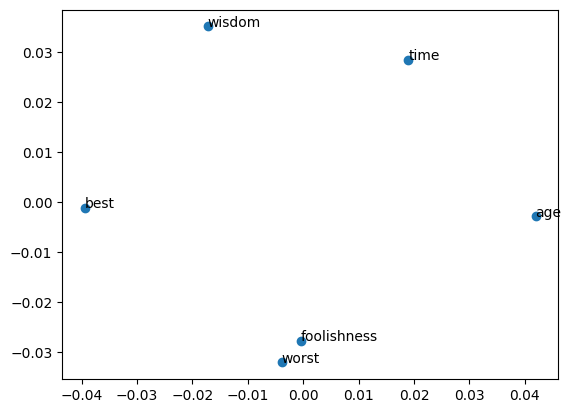

In [13]:
# Visualization of word embeddings

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = word2vec_vect.wv[word2vec_vect.wv.index_to_key]
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(word2vec_vect.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [14]:
# Find most similar words
similar_words = word2vec_vect.wv.most_similar('time', topn=1)

print(similar_words)

[('wisdom', 0.06797593832015991)]


In [15]:
# Computing the similarity between word vectors

word2vec_vect.wv.similarity('best', 'worst')

0.13887982

### **Getting Sentence Embedding (Document Embeddings)**

In [16]:
# Remove out-of-vocabulary words

sentence = ['best', 'bansal', 'time', 'kanav']

vocab_tokens = [word for word in sentence if word in word2vec_vect.wv.index_to_key]

vocab_tokens

['best', 'time']

In [17]:
# Create document vectors by averaging word vectors
np.mean(word2vec_vect.wv[vocab_tokens], axis=0)

array([-8.6735850e-03,  2.8979499e-03,  2.1581696e-03, -1.7885750e-03,
       -9.8061212e-04, -3.7891967e-03,  2.7690111e-03,  4.8756767e-03,
       -4.6693720e-03, -6.5232953e-03, -2.7048176e-03, -5.3278962e-03,
       -6.4251497e-03, -1.2493895e-03,  3.0445517e-04, -5.6858570e-04,
        3.8068579e-04,  9.2990650e-04, -3.0666459e-03, -1.1344015e-03,
       -3.3043111e-03, -2.6271159e-03,  8.2706194e-03, -1.0838672e-03,
       -2.2073742e-04, -3.7620717e-04, -9.0713974e-04, -2.5862674e-03,
       -1.3156777e-04,  6.6179251e-03,  7.8556351e-03, -6.5627526e-03,
       -2.5582409e-03, -6.9178990e-03,  1.9483893e-03,  6.0251304e-03,
        6.4321910e-03,  5.5842018e-03,  7.2997799e-03,  3.0152500e-03,
        8.7251253e-03, -7.1729645e-03, -8.2131261e-03, -1.3105709e-03,
       -1.9392008e-03,  2.3391065e-03,  2.6729943e-03,  2.9715800e-03,
        4.0672242e-04,  8.2550046e-05,  5.2809850e-03, -8.9346431e-03,
        3.8251362e-03,  6.0026506e-03, -5.2615297e-03,  5.4140193e-03,
      

In [18]:
def get_document_vector(doc, model):
    """Remove out-of-vocabulary words. 
    Create document vectors by averaging word vectors."""
    tokens = [word for word in doc if word in model]
    if tokens:
        doc_embedding = np.mean(model[tokens], axis=0)
    else:
        doc_embedding = np.zeros(model.vector_size)
    return doc_embedding

In [19]:
df['w2v_doc_embeddings'] = df["tokenised_sentences"].apply(lambda doc : get_document_vector(doc, word2vec_vect.wv))

df.head()

,text,clean_text,tokenised_sentences,w2v_doc_embeddings
0,it Was the best oF Times $,best time,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00..."
1,It was The worst of times.,worst time,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0...."
2,IT 9 was tHe age Of wisdom,age wisdom,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0..."
3,it was thE age of foolishness,age foolishness,"[age, foolishness]","[-0.00022083164, 0.0016568756, -0.0008546477, ..."


## **Pretrained Word2Vec and GloVe**

In [20]:
import gensim.downloader as api

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [28]:
# # For the sake of this example, we will be loading pre-trained GloVe model
# # You can also choose a Word2Vec or a FastText model as well

# glove_vect = api.load('glove-twitter-50')

# # Approax 200MB Size
# # Save Embeddings
# glove_vect.save('pretrained_models/.50d_glove_vec.kv')

In [29]:
# Load Embeddings
from gensim.models import KeyedVectors

glove_vect = KeyedVectors.load('pretrained_models/.50d_glove_vec.kv')

print(type(glove_vect))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [30]:
# Vocabulary Size and Word Embedding Shape

print(f"Vocabulary size: {len(glove_vect.index_to_key)}")
print(f"Vector Size: {glove_vect.vector_size}")

Vocabulary size: 1193514
Vector Size: 50


In [31]:
# Getting vector for a word

print(f"Word Embedding Shape: { glove_vect['college'].shape }")
print()
print(glove_vect['college'])

# # We can also use the following:
# print(model.wv.__getitem__('time'))

Word Embedding Shape: (50,)

[ 1.7885   -0.067292  0.46616  -0.81783   0.10752   0.30621   1.4632
 -0.12453  -0.10154  -0.23087  -0.572     0.086826 -4.051     0.85883
  0.71311  -0.049015 -0.51012   0.22284  -0.98466   0.78809   0.53688
  0.17593   0.26659  -0.86271   0.051508  0.29894   0.74473  -0.85046
 -0.32939  -0.31356   0.63817  -1.1198   -0.1482   -0.46216   0.046157
 -0.46282  -0.32383   1.5272    0.76098  -0.1311   -0.35028   0.51516
 -0.07257   0.2536    0.5363   -0.46969   0.3285    0.17779  -0.47109
  0.37841 ]


In [32]:
tokens = word2vec_vect.wv.index_to_key

print(tokens)

['age', 'time', 'foolishness', 'wisdom', 'worst', 'best']


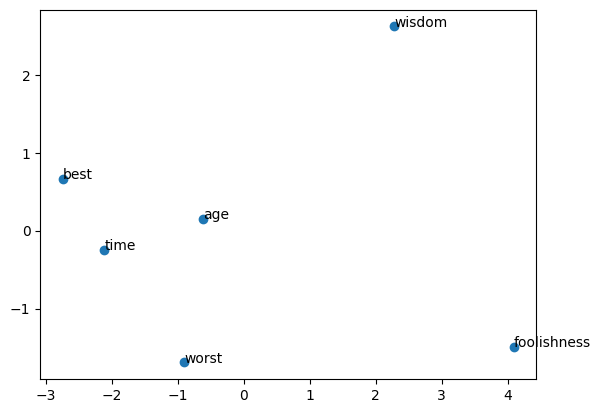

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = glove_vect[tokens]
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(tokens):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [34]:
# Find most similar words
similar_words = glove_vect.most_similar('time', topn=5)

print(similar_words)

[('then', 0.9046667814254761), ('break', 0.9012036323547363), ('last', 0.8918827176094055), ('maybe', 0.8871403336524963), ('before', 0.884469747543335)]


In [35]:
glove_vect.most_similar("developer", topn=5)

[('sharepoint', 0.8866323828697205),
 ('administrator', 0.8673086166381836),
 ('programmer', 0.8619340658187866),
 ('architect', 0.8591458201408386),
 ('oracle', 0.8557209372520447)]

In [36]:
# Computing the similarity between word vectors

glove_vect.similarity("developer", "development")

0.7817412

### **Getting Sentence Embedding from Pretrained Model (Document Embeddings)**

In [37]:
df['glove_doc_embeddings'] = df["tokenised_sentences"].apply(lambda doc : get_document_vector(doc, glove_vect))

df.head()

,text,clean_text,tokenised_sentences,w2v_doc_embeddings,glove_doc_embeddings
0,it Was the best oF Times $,best time,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00...","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431..."
1,It was The worst of times.,worst time,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0..."
2,IT 9 was tHe age Of wisdom,age wisdom,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70..."
3,it was thE age of foolishness,age foolishness,"[age, foolishness]","[-0.00022083164, 0.0016568756, -0.0008546477, ...","[0.14098799, 0.16774501, -0.592085, 0.2619315,..."


## **Word2Vec vs BERT**

**Embeddings**  
Word2Vec offers pre-trained word embeddings that anyone can use off-the-shelf. The embeddings are key: value pairs, essentially 1-1 mappings between words and their respective vectors. Word2Vec takes a single word as input and outputs a single vector representation of that word. 

Since BERT generates contextual embeddings, it takes as input a sequence (usually a sentence) rather than a single word. BERT needs to be shown the context that surrounding words provide before it can generate a word embedding. With BERT, you do need to have the actual model as the vector representations of words will vary based on the specific sequences you’re inputting. The output is a fixed-length vector representation of the input sentence. 

BERT or Bidirectional Encoder Representations from Transformers, is a technique that allows for bidirectional training of Transformers for natural language modeling tasks. Language models which are bidirectionally trained can learn deeper context from language than single-direction models. BERT generates context aware embeddings that allow for multiple representations (each representation, in this case, is a vector) of each word based on a given word’s context.

**Word Ordering**  
Word2Vec embeddings do not take into account the word position.

BERT model explicitly takes as input the position (index) of each word in the sentence before calculating its embedding.

**Out-of-Vocabulary**  
Since Word2Vec learns embeddings at word level, it can only generate embeddings for words that existed in it’s training set (aka it’s “vocabulary space”). This is a major drawback to Word2Vec - that it just doesn’t support Out-of-Vocabulary words.

Alternatively, BERT learns representations at the subword level, so a BERT model will have a smaller vocabulary space than the number of unique words in its training corpus. In turn, BERT is able to generate embeddings for words outside of its vocabulary space giving it a near infinite vocabulary. 

## **Sentence BERT (SBERT)**

```python
!pip install -U sentence-transformers
```

Sentence BERT References:  
https://www.sbert.net/index.html  
https://www.sbert.net/docs/pretrained_models.html  

Find the paper for Sentence BERT here: https://arxiv.org/pdf/1908.10084.pdf

**BERT (Devlin et al., 2018) and RoBERTa (Liu et al., 2019) has set a new state-of-the-art performance on sentence-pair regression tasks like semantic textual similarity (STS). However, it requires that both sentences are fed into the network, which causes a massive computational overhead: Finding the most similar pair in a collection of 10,000 sentences requires about 50 million inference computations (~65 hours) with BERT. The construction of BERT makes it unsuitable for semantic similarity search as well as for unsupervised tasks like clustering.**

**Sentence-BERT (SBERT), a modification of the pretrained BERT network that use siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. This reduces the effort for finding the most similar pair from 65 hours with BERT / RoBERTa to about 5 seconds with SBERT, while maintaining the accuracy from BERT.**

### Usage

- Computing Sentence Embeddings
- Semantic Textual Similarity
- Semantic Search
- Retrieve and Re-Rank
- Clustering
- Paraphrase Mining
- Translated Sentence Mining
- Cross Encoders
- Image Search

In [39]:
# ! pip install -U sentence-transformers

In [41]:
from sentence_transformers import SentenceTransformer

bert_vect = SentenceTransformer('all-MiniLM-L6-v2')

### Model Overview

```
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('model_name')
```

All models are hosted on the [HuggingFace Model Hub](https://huggingface.co/sentence-transformers).

The following table provides an overview of (selected) models. They have been extensively evaluated for their quality to embedded sentences (Performance Sentence Embeddings) and to embedded search queries & paragraphs (Performance Semantic Search).

The **all-* models** where trained on all available training data (more than 1 billion training pairs) and are designed as general purpose models. The **all-mpnet-base-v2** model provides the best quality, while **all-MiniLM-L6-v2 is 5 times faster** and still offers good quality. Toggle All models to see all evaluated models or visit [HuggingFace Model Hub](https://huggingface.co/models?library=sentence-transformers) to view all existing sentence-transformers models.

#### Model Name  
**`all-mpnet-base-v2`**
> Description: 	All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.  
> Dimensions: 	768  
> Suitable Score Functions: 	dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance  
> Size: 	420 MB  
> Training Data: 	1B+ training pairs. For details, see model card.  
> Model Card: 	https://huggingface.co/sentence-transformers/all-mpnet-base-v2

**`multi-qa-mpnet-base-dot-v1`**
> Description: 	This model was tuned for semantic search: Given a query/question, if can find relevant passages. It was trained on a large and diverse set of (question, answer) pairs.  
> Dimensions: 	768  
> Suitable Score Functions: 	dot-product (util.dot_score)  
> Size: 	420 MB  
> Training Data: 	215M (question, answer) pairs from diverse sources.  
> Model Card: 	https://huggingface.co/sentence-transformers/multi-qa-mpnet-base-dot-v1

**`all-distilroberta-v1`**
> Description: 	All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.  
> Dimensions:	768  
> Suitable Score Functions:	dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance  
> Size:	290 MB  
> Training Data:	1B+ training pairs. For details, see model card.  
> Model Card: 	https://huggingface.co/sentence-transformers/all-distilroberta-v1

**`all-MiniLM-L6-v2`**
> Description: 	All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.  
> Dimensions: 	384  
> Suitable Score Functions: 	dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance  
> Size: 	80 MB  
> Training Data: 	1B+ training pairs. For details, see model card.  
> Model Card: 	https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2


**List of Pretrained models available:**
```
all-MiniLM-L12-v2
multi-qa-distilbert-cos-v1
multi-qa-MiniLM-L6-cos-v1
multi-qa-MiniLM-L6-cos-v1
paraphrase-multilingual-mpnet-base-v2
paraphrase-albert-small-v2
paraphrase-multilingual-MiniLM-L12-v2
paraphrase-MiniLM-L3-v2
distiluse-base-multilingual-cased-v1
distiluse-base-multilingual-cased-v2
```

In [42]:
# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

# Sentences are encoded by calling bert_vect.encode()
embeddings = bert_vect.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173459e-02 -4.28515188e-02 -1.56286024e-02  1.40537797e-02
  3.95537801e-02  1.21796258e-01  2.94333864e-02 -3.17523889e-02
  3.54959629e-02 -7.93139860e-02  1.75878592e-02 -4.04370055e-02
  4.97259274e-02  2.54912041e-02 -7.18700588e-02  8.14968869e-02
  1.47070049e-03  4.79627140e-02 -4.50336300e-02 -9.92174819e-02
 -2.81769671e-02  6.45046532e-02  4.44670469e-02 -4.76217121e-02
 -3.52952629e-02  4.38671932e-02 -5.28565831e-02  4.33033478e-04
  1.01921469e-01  1.64072085e-02  3.26996446e-02 -3.45986821e-02
  1.21339206e-02  7.94871151e-02  4.58346587e-03  1.57778263e-02
 -9.68205091e-03  2.87625752e-02 -5.05806208e-02 -1.55793773e-02
 -2.87906546e-02 -9.62282810e-03  3.15556638e-02  2.27348655e-02
  8.71449336e-02 -3.85027416e-02 -8.84718597e-02 -8.75498541e-03
 -2.12342888e-02  2.08923370e-02 -9.02077407e-02 -5.25732227e-02
 -1.05638960e-02  2.88310722e-02 -1.61454901e-02  6.17840327e-03
 -1.23234

In [43]:
embeddings.shape

(3, 384)

In [45]:
from sentence_transformers import util

emb1 = bert_vect.encode("I am eating Mango")
emb2 = bert_vect.encode("I like fruits")
emb3 = bert_vect.encode("I work at Microsoft")
cos_sim_12 = util.cos_sim(emb1, emb2)
cos_sim_13 = util.cos_sim(emb1, emb3)
print("Cosine-Similarity between 1 and 2:", cos_sim_12)
print("Cosine-Similarity between 1 and 3:", cos_sim_13)

Cosine-Similarity between 1 and 2: tensor([[0.4914]])
Cosine-Similarity between 1 and 3: tensor([[0.1904]])


In [46]:
sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = bert_vect.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

cos_sim

tensor([[ 1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
          0.0630],
        [ 0.7553,  1.0000, -0.0610,  0.1442, -0.0809, -0.0216,  0.1157,  0.0362,
          0.0216],
        [-0.1050, -0.0610,  1.0000, -0.1088,  0.0217, -0.0413, -0.0928,  0.0231,
          0.0247],
        [ 0.2474,  0.1442, -0.1088,  1.0000, -0.0348,  0.0362,  0.7369,  0.0821,
          0.1389],
        [-0.0704, -0.0809,  0.0217, -0.0348,  1.0000, -0.1654, -0.0592,  0.1961,
          0.2564],
        [-0.0333, -0.0216, -0.0413,  0.0362, -0.1654,  1.0000,  0.0769, -0.0380,
         -0.0895],
        [ 0.1707,  0.1157, -0.0928,  0.7369, -0.0592,  0.0769,  1.0000,  0.0495,
          0.1191],
        [ 0.0476,  0.0362,  0.0231,  0.0821,  0.1961, -0.0380,  0.0495,  1.0000,
          0.6433],
        [ 0.0630,  0.0216,  0.0247,  0.1389,  0.2564, -0.0895,  0.1191,  0.6433,
          1.0000]])

In [49]:
df['sbert_doc_embeddings'] = df['clean_text'].apply(bert_vect.encode)

df.head()

,text,clean_text,tokenised_sentences,w2v_doc_embeddings,glove_doc_embeddings,sbert_doc_embeddings
0,it Was the best oF Times $,best time,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00...","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431...","[-0.0924282, 0.032537505, -0.018796407, -0.033..."
1,It was The worst of times.,worst time,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0...","[-0.073623896, 0.07536217, 0.005589636, 0.0316..."
2,IT 9 was tHe age Of wisdom,age wisdom,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70...","[0.02470788, 0.14167035, 0.012471464, 0.063883..."
3,it was thE age of foolishness,age foolishness,"[age, foolishness]","[-0.00022083164, 0.0016568756, -0.0008546477, ...","[0.14098799, 0.16774501, -0.592085, 0.2619315,...","[0.05471872, 0.13996215, 0.05851771, -0.003388..."
